In [1]:
import pandas as pd     # dataframes
import numpy as np      # numbers and arrays 
import matplotlib.pyplot as plt  # plotting
from sklearn import datasets     
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.datasets import fashion_mnist as fashion_mnist

2023-01-12 10:47:51.233415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data() 
# don't forget to shuffle training and testing data !

In [4]:
X_train_full.shape
X_test.shape

(10000, 28, 28)

# Task2 -- Change the choice of instances for training, validation and testing.

In [5]:
X_max=np.concatenate((X_train_full,X_test),axis=0)
X_max.shape

(70000, 28, 28)

In [6]:
y_max=np.concatenate((y_train_full,y_test),axis=0)
y_max.shape

(70000,)

# Task4 -- Test this by picking only a tenth of the available data

In [7]:
X_train=X_max[:10000]
X_test=X_max[:10000]
X_train.shape

(10000, 28, 28)

In [8]:
y_train=y_max[:10000]
#y_test=y_max[:10000]
y_train.shape

(10000,)

In [9]:
X_test.shape #10000
#X_train_full.shape #60000
#y_test.shape #10000
#y_train_full.shape #60000

(10000, 28, 28)

In [10]:
X_train_full[1,:,:]
type(X_train_full[1,1,1])
#X_train_full.dtype

numpy.uint8

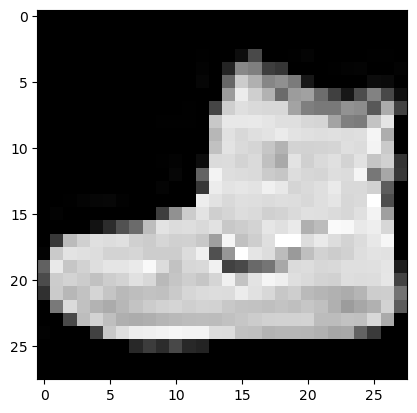

In [11]:
image=X_train_full[0,:,:]
image=X_test[0]
plt.imshow(image,cmap='gray')
plt.show()

In [12]:
y_train_full[0]

9

In [13]:
class_names=["T-shirt","Trousers","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
#type(class_names)

In [14]:
class_names[y_train_full[0]]

'Ankle boot'

In [15]:
X_valid=X_train_full[:5000]/255.0  # first 5000 instances of X_train_full
X_train=X_train_full[5000:]
y_valid=y_train_full[:5000]  # first 5000 instances of y_train_full
y_train=y_train_full[5000:]
X_test=X_test/255.0

In [16]:
#X_test[0]
X_valid.shape
#y_train.shape
X_train.shape

(55000, 28, 28)

In [17]:
#X_train_full[4999]
y_test.shape
X_test.shape

(10000, 28, 28)

# Task3 -- reduce number of neurons / layers

In [18]:
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #input
model.add(Dense(150,activation="relu")) #Sigmoid / relu    300->200
#model.add(Dense(100,activation="relu")) #layer    100->50
model.add(Dense(10,activation="softmax")) #output

2023-01-12 10:47:54.792354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [21]:
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 2s 928us/step - loss: 211.6092 - accuracy: 0.1016 - val_loss: 2.3014 - val_accuracy: 0.1016
Epoch 2/5
1719/1719 [==============================] - 1s 869us/step - loss: 2.2709 - accuracy: 0.1143 - val_loss: 2.3022 - val_accuracy: 0.0938
Epoch 3/5
1719/1719 [==============================] - 1s 870us/step - loss: 2.2501 - accuracy: 0.1261 - val_loss: 2.2901 - val_accuracy: 0.1192
Epoch 4/5
1719/1719 [==============================] - 1s 865us/step - loss: 2.2258 - accuracy: 0.1385 - val_loss: 2.3009 - val_accuracy: 0.0922
Epoch 5/5
1719/1719 [==============================] - 1s 867us/step - loss: 2.2161 - accuracy: 0.1396 - val_loss: 2.2873 - val_accuracy: 0.1094


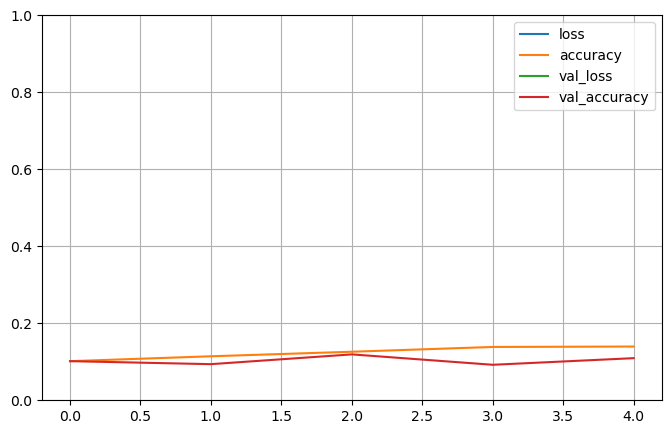

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [23]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 630us/step - loss: 2.3147 - accuracy: 0.1000


[2.3147459030151367, 0.10000000149011612]